# 인공 신경망

## 패션 MNIST

In [ ]:
# 텐서플로의 케라스 패키지를 임포트하고 패션 MNIST 데이터를 다운로드
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- 이 훈련 데이터는 60,000개의 이미지, 각 이미지는 28 x 28 크기임. 타깃도 60,000개의 원소가 있는 1차원 배열

In [ ]:
# 테스트 세트의 크기도 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


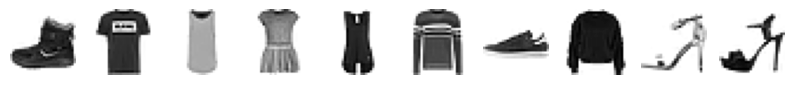

In [ ]:
# 몇 개의 샘플을 그림으로 출력해보기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
# 파이썬의 리스트 내포를 사용해서 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 레이블 설명

>0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠

In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- 0~9까지 레이블마다 정확히 6,000개의 샘플이 들어 있는 것을 확인

## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# reshape() 메서드를 사용해 2차원 배열인 각 샘플을 1차원 배열로 펼치기
# reshape() 메서드의 두 번째 매개변수를 28 x 28 이미지 크기에 맞게 지정하면 첫 번째 차원은 변하지 않고
# 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐짐
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
# 4장에서처럼 SGDClassifier 클래스와 cross_validate 함수를 사용해 교차검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


- 만족할 만한 수준이 아님
- z_티셔츠 = w1 x (픽셀1) + w2 x (픽셀2) + ... + w784 x (픽셀784) + b
- z_바지 = w1' x (픽셀1) + w2' x (픽셀2) + ... + w784' x (픽셀784) + b'


### 인공신경망?

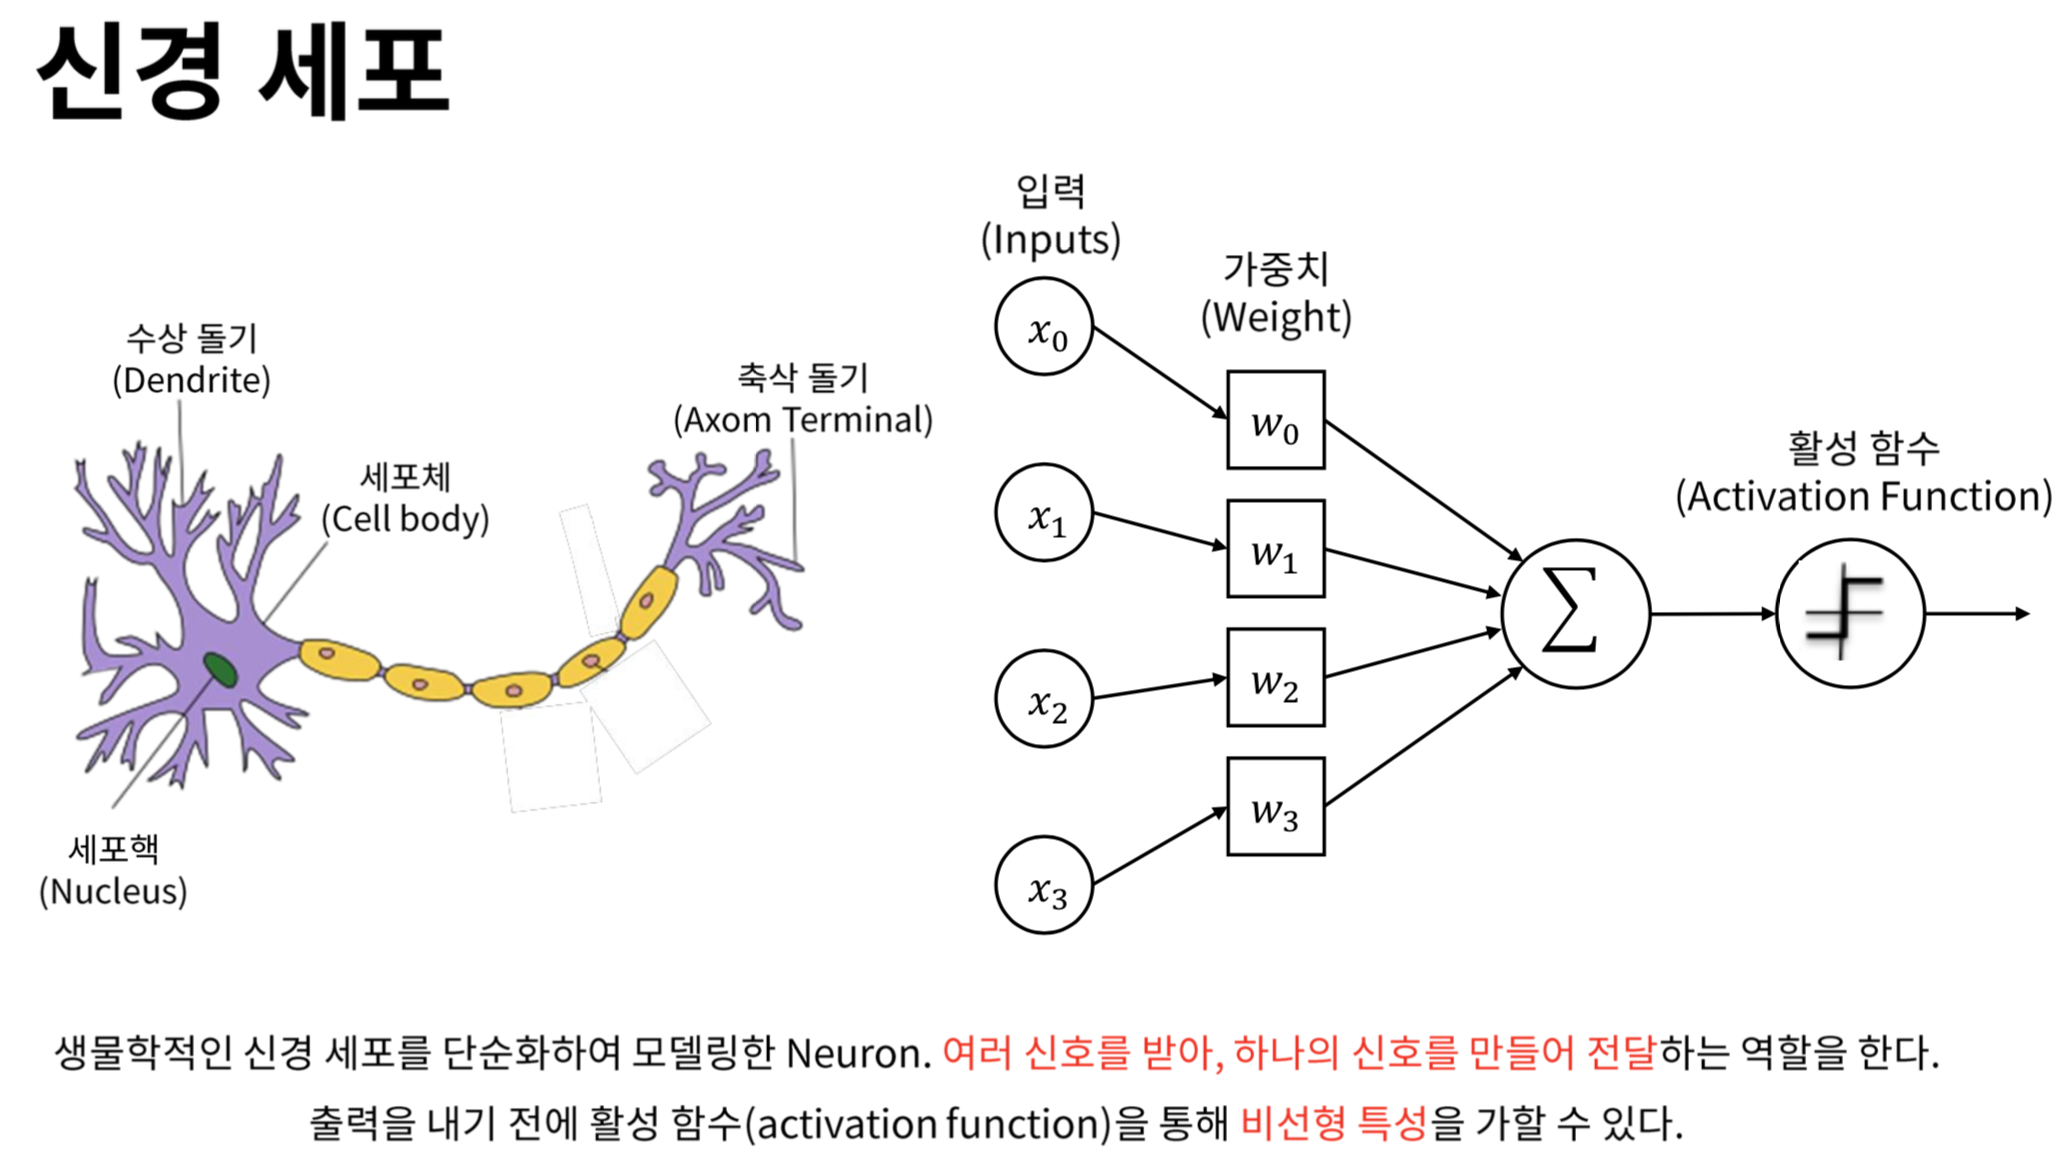- 신경망이란 무엇인가요?
  - 신경망은 인간의 두뇌에서 영감을 얻은 방식으로 데이터를 처리하도록 컴퓨터를 가르치는 인공 지능 방식입니다. 인간의 두뇌와 비슷한 계층 구조로 상호 연결된 노드 또는 뉴런을 사용하는 딥 러닝이라고 불리는 기계 학습 과정의 유형입니다.


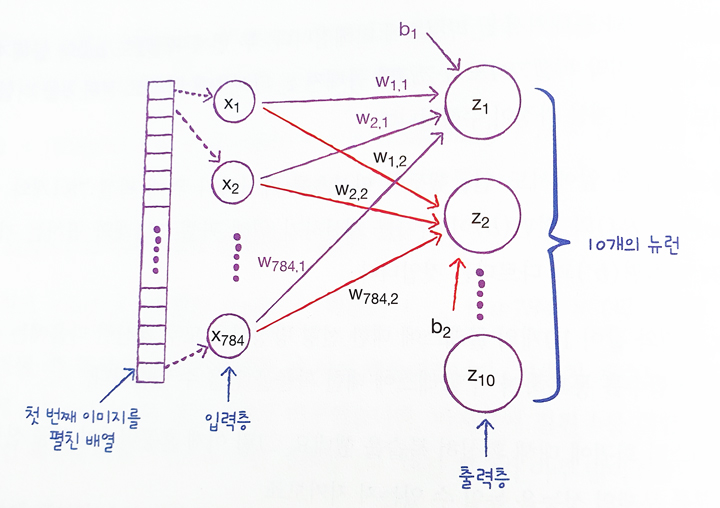

### 텐서플로와 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

>- **텐서플로**는 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리
- 텐서플로에는 저수준 API와 고수준 API가 있음
- 케라스가 텐서플로의 고수준 API로, 프랑소와 숄레가 만든 딥러닝 라이브러리
- 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다는 것

> - 케라스 라이브러리는 직접 GPU 연산을 수행하지 않음. 대신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용
- 프랑소와가 구글에 합류한 뒤 텐서플로 라이브러리에 케라스 API가 내장되었음
- 현재는 케라스와 텐서플로가 거의 동의어가 됨


## 인공 신경망으로 모델 만들기

In [ ]:
# 로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가했지만,
# 인공 신경망에서는 교차 검증을 잘 사용하지않고 검증 세트를 별도로 덜어내어 사용함
## 이렇게 하는 이유는 1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이고,
## 2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
# 60000개 중에 12000개가 검증 세트로 분리됨.
print(val_scaled.shape, val_target.shape)
# 밀집층, 전결합 계층, 완전 연결층

(12000, 784) (12000,)


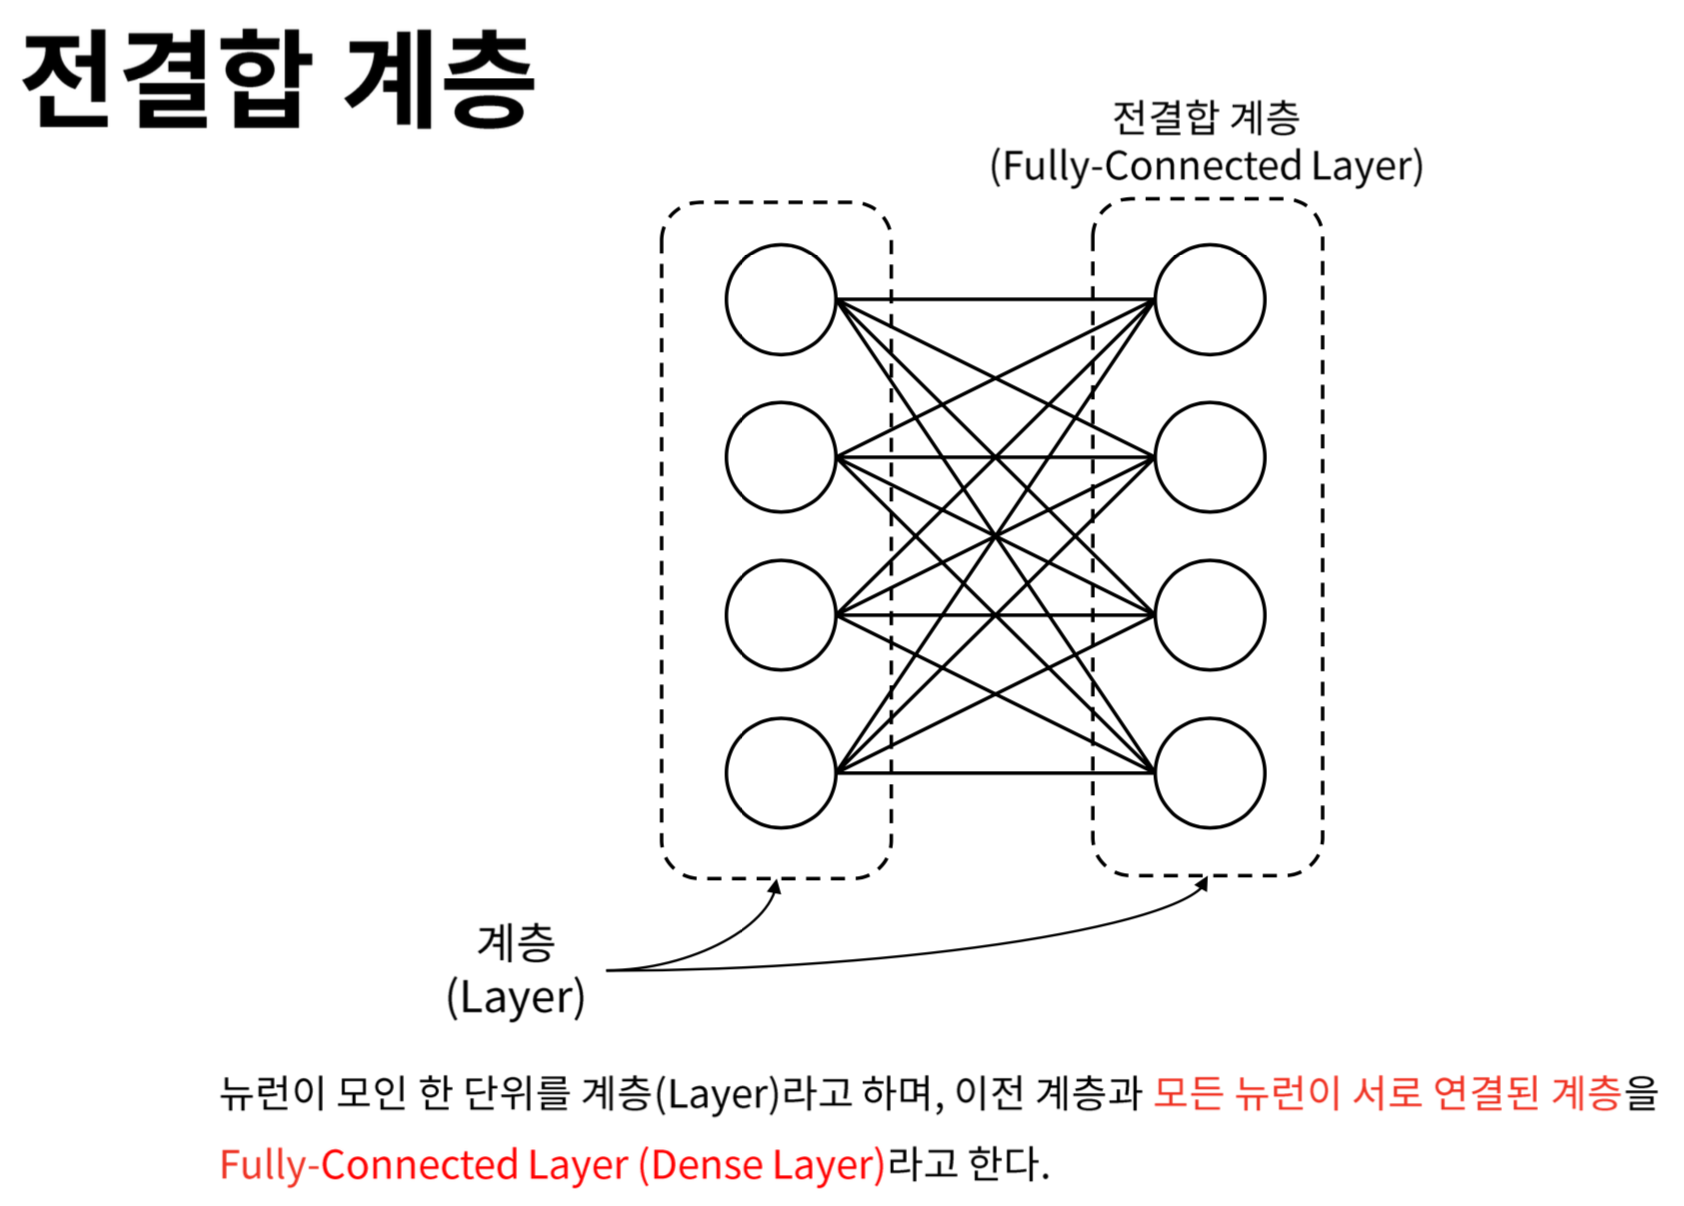

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 10 = 뉴런개수, activation='softmax' > 뉴런의 출력에 적용할 함수, input_shape > 입력의 크기)

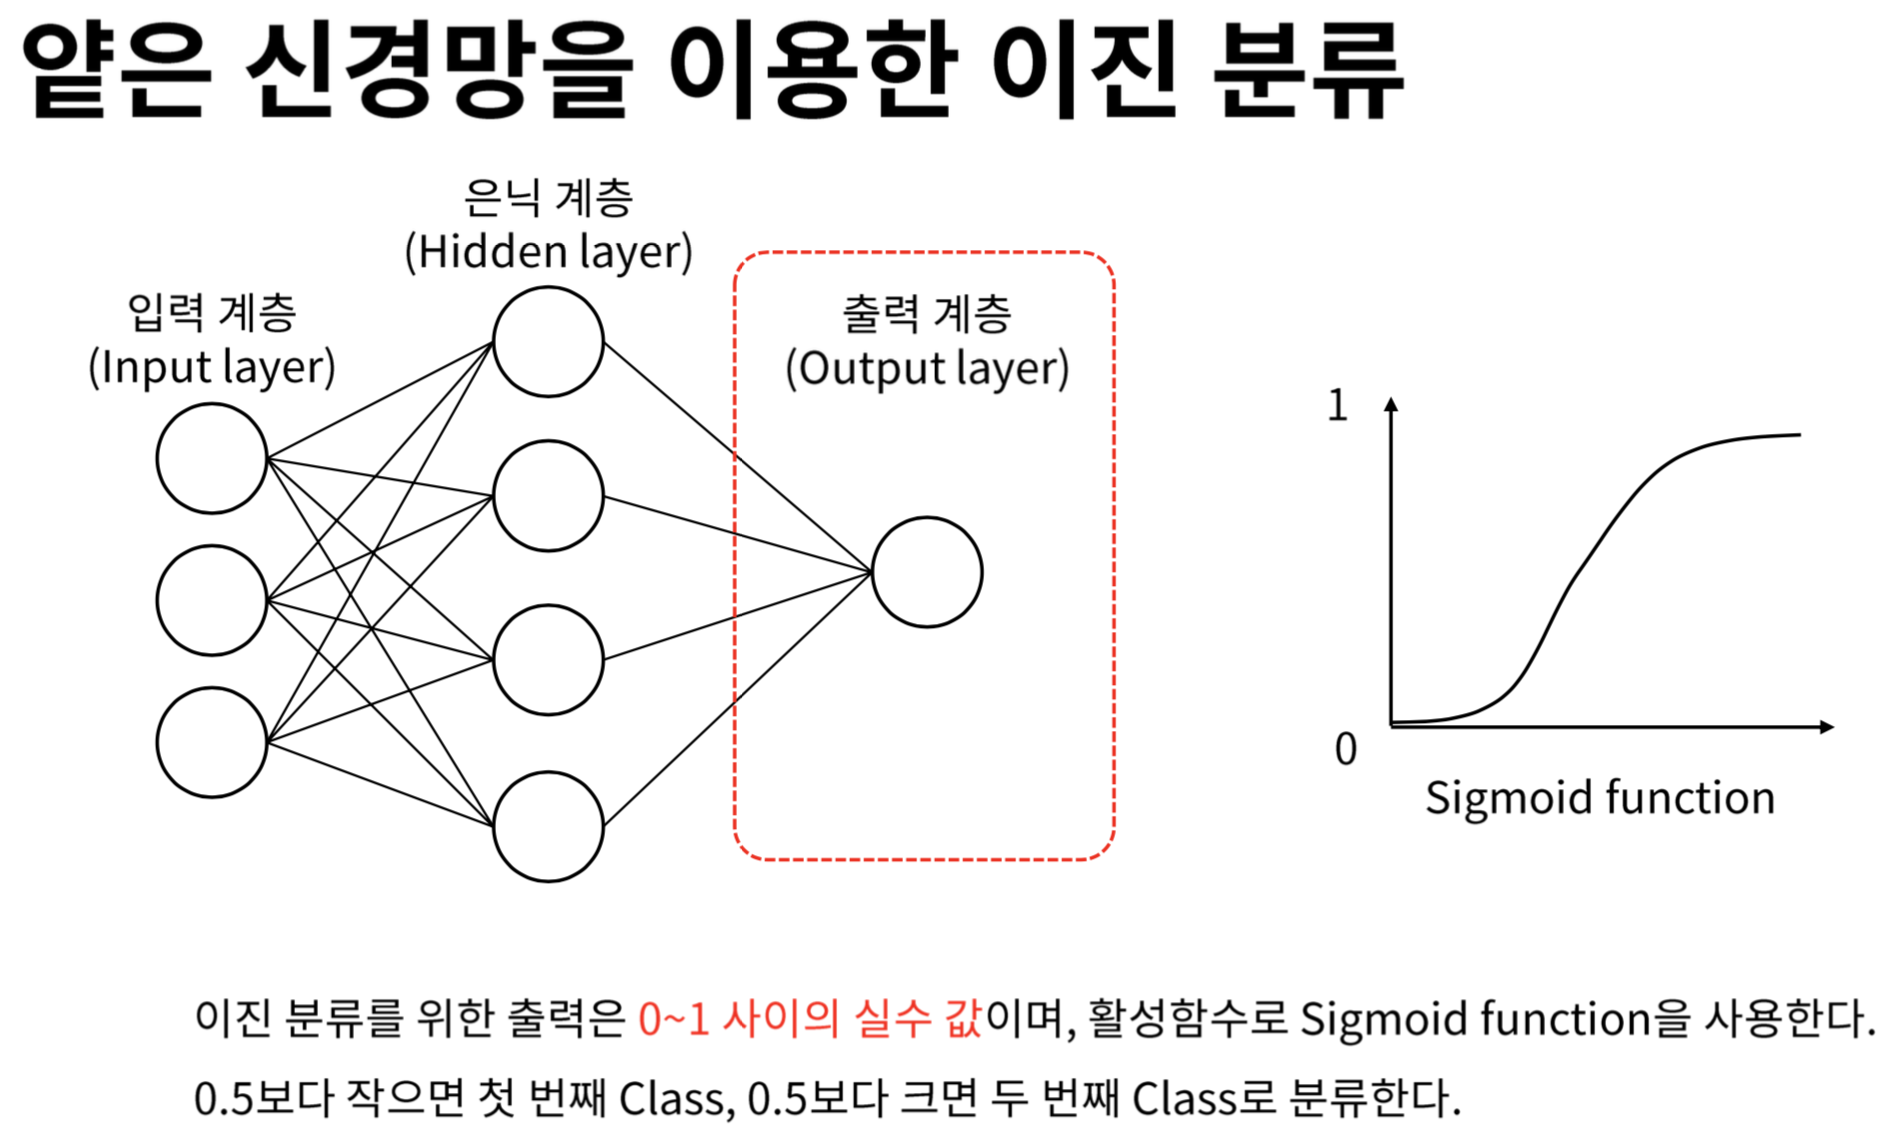

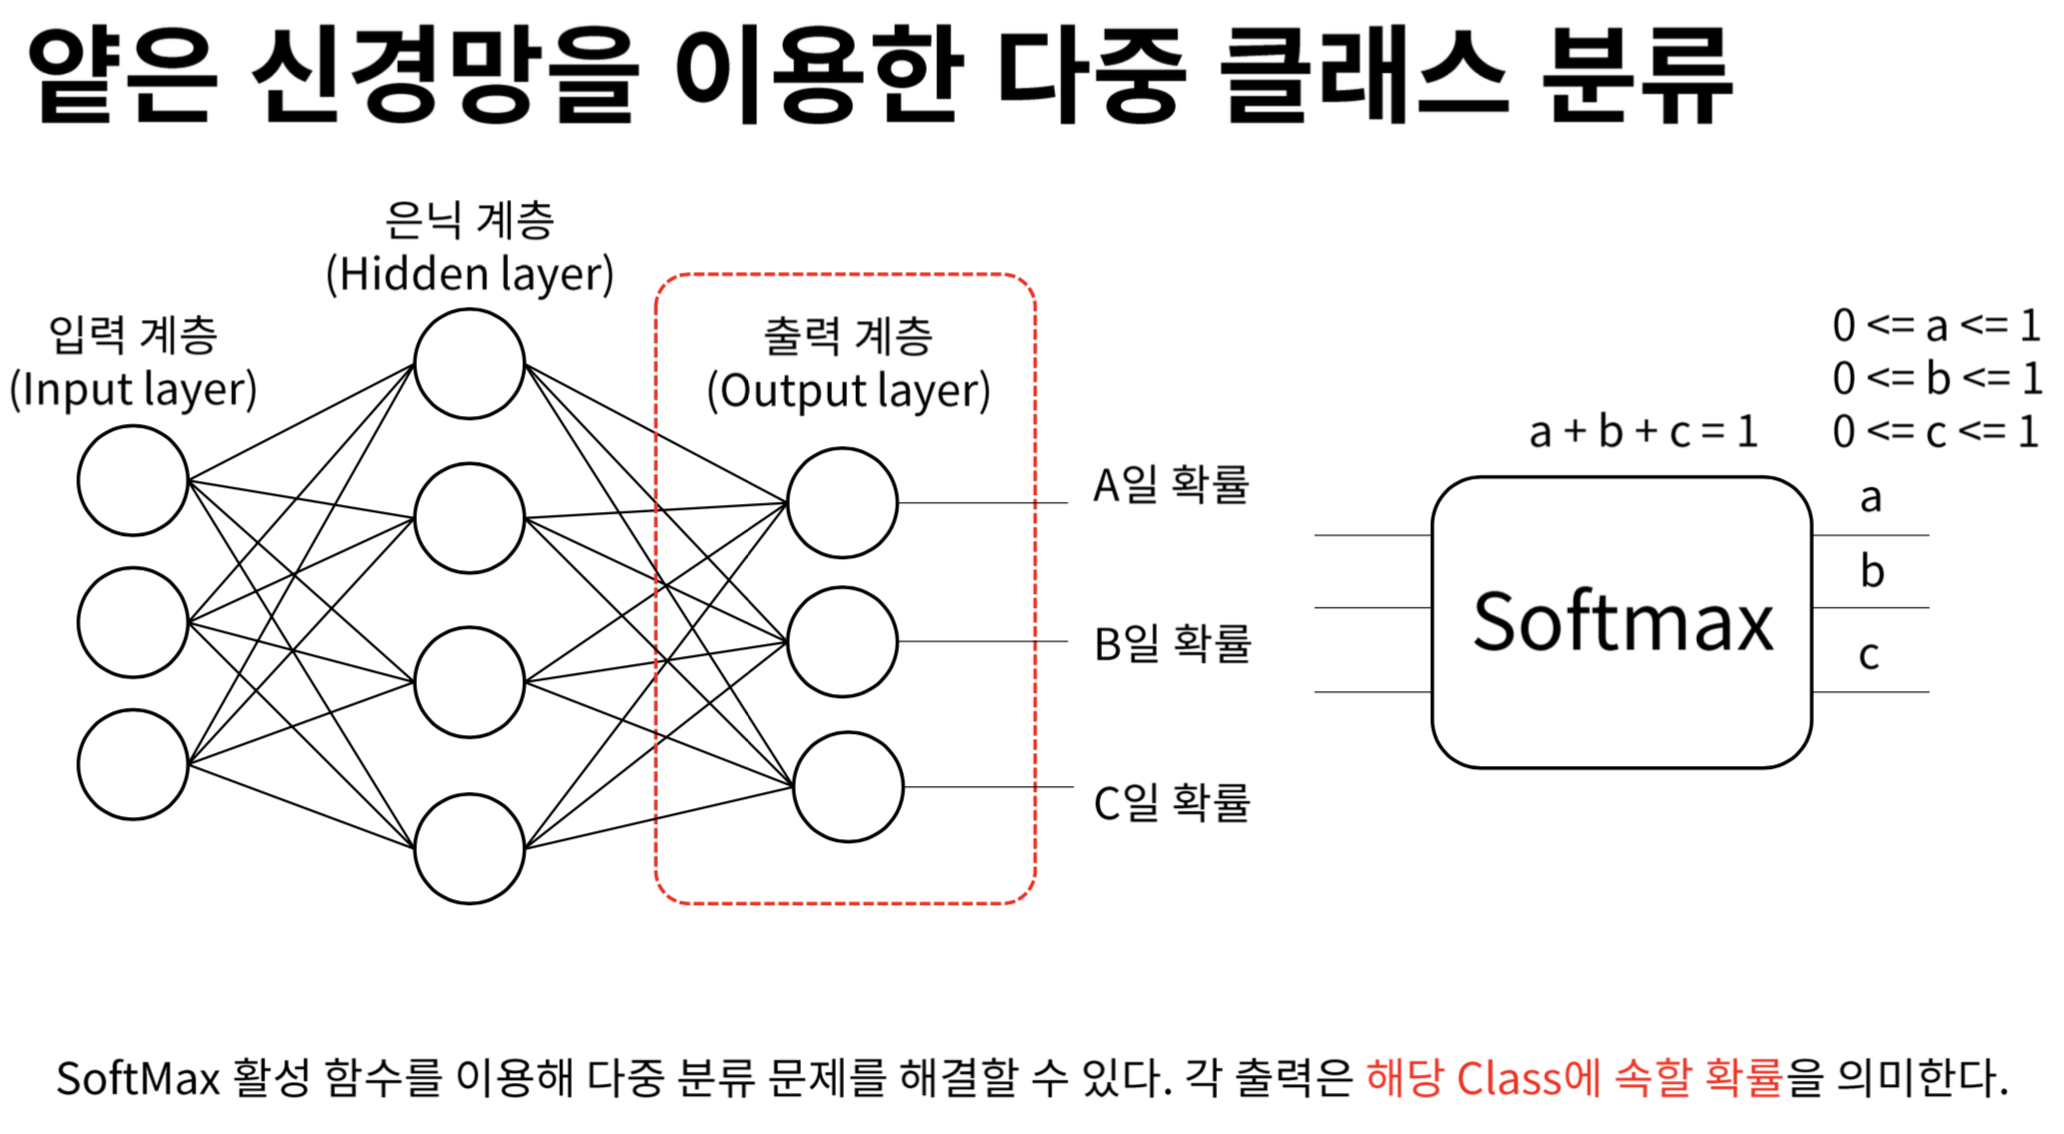

In [ ]:
model = keras.Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기

- sparse_categorical_crossentropy
  - 크로스 엔트로피 손실 함수
    - 이진 분류: loss = 'binary_crossentopy'
    - 다중 분류: loss = 'categorical_crossentropy'

  - 훈련데이터의 label(y / target) 값이 원-핫 벡터 형태인경우  categorical_crossentropy 를 사용하고

  - 훈련 데이터의 label(y / target) 값이 정수(Int) 형태인 경우에는 sparse_categorical_crossentropy를 사용하면 된다.

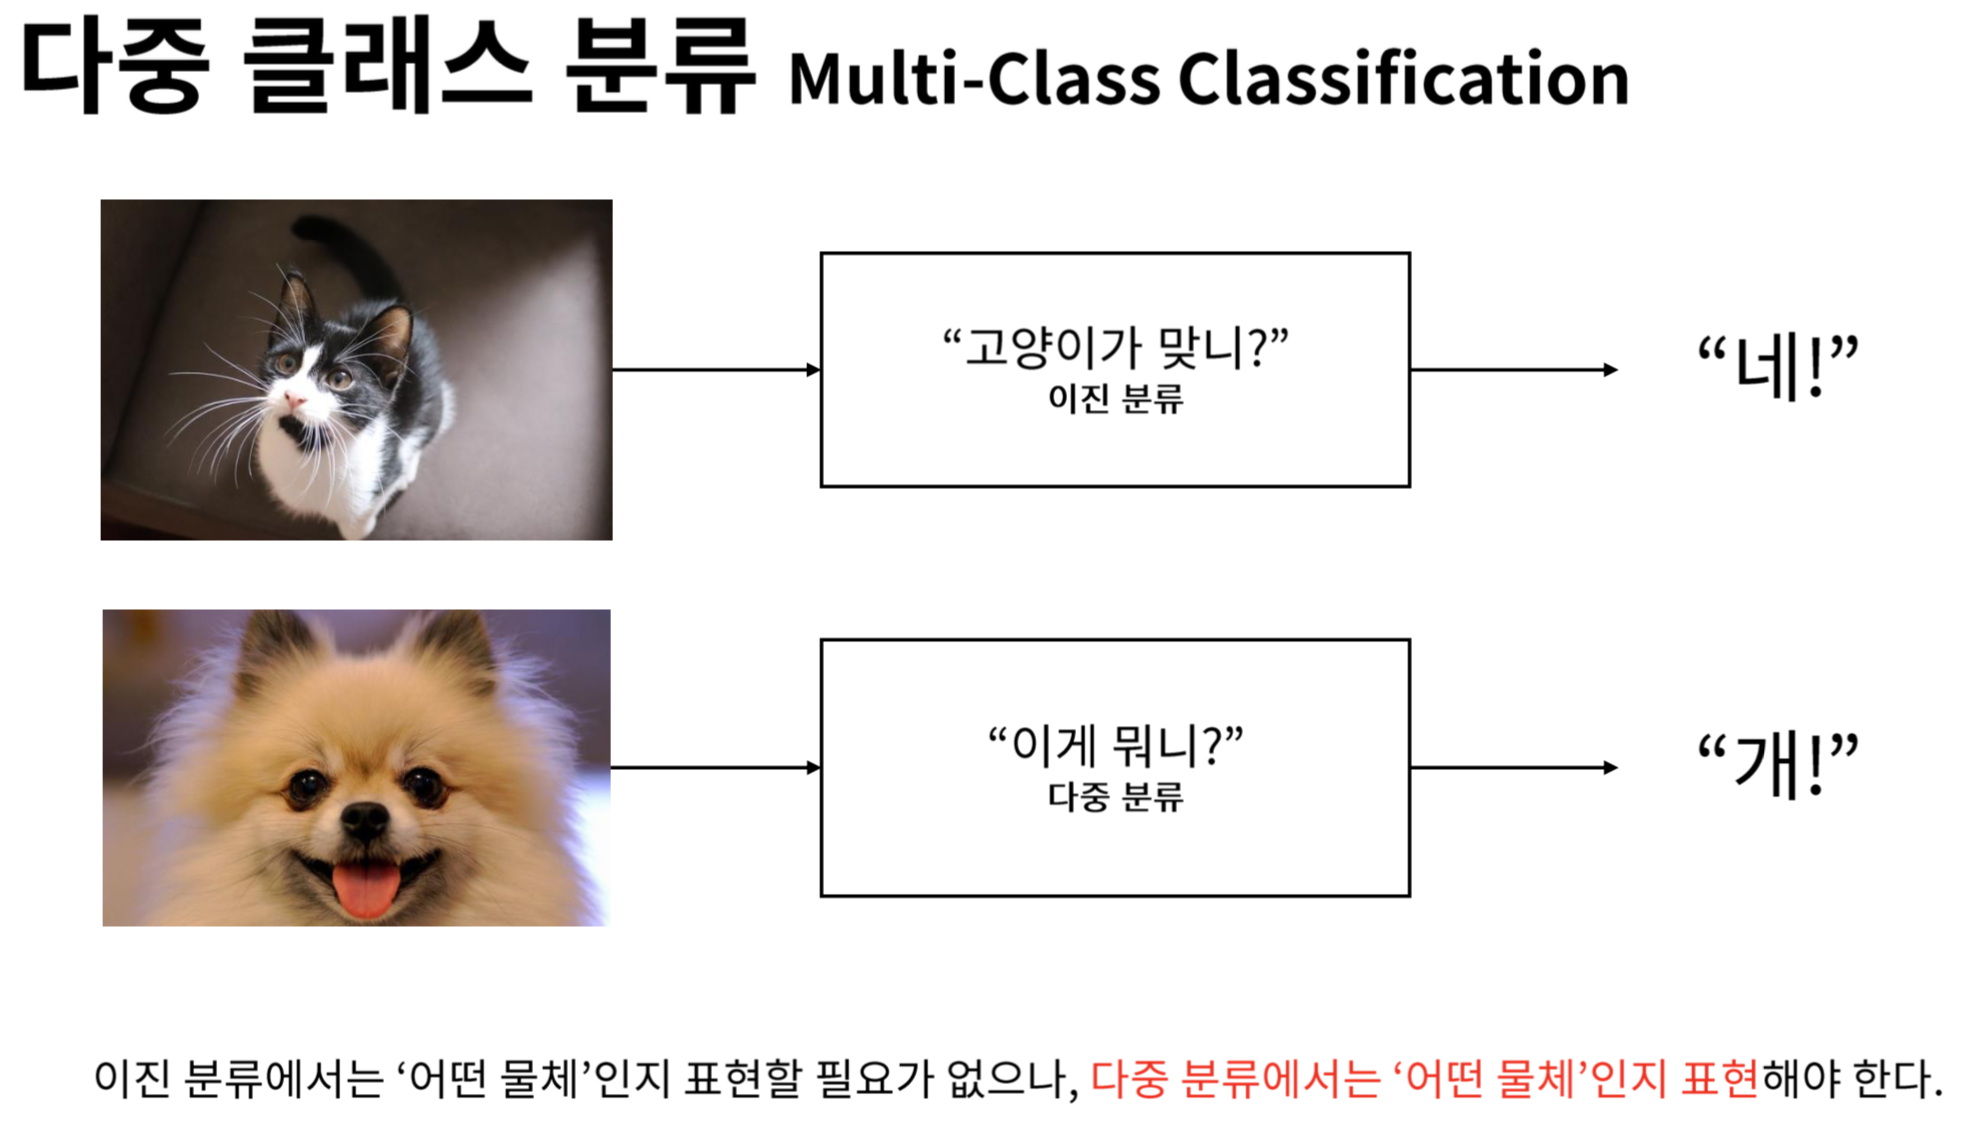

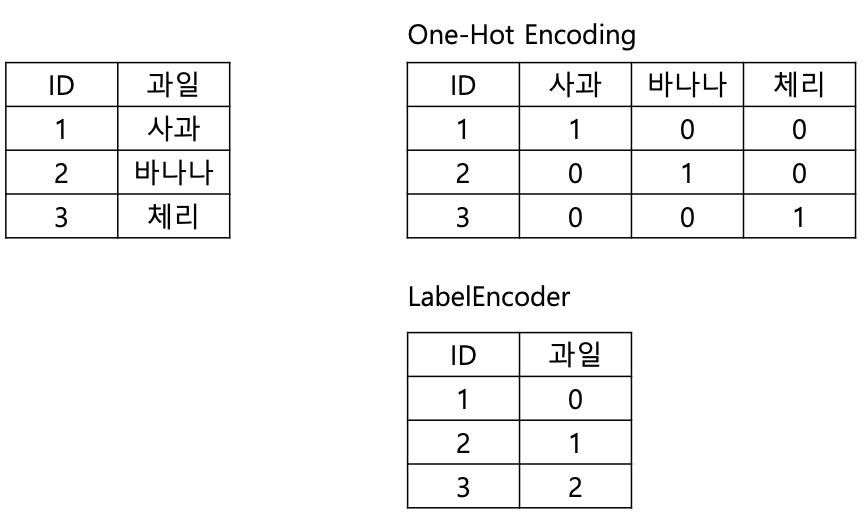

In [ ]:
# 케라스는 모델이 훈련할때 기본으로 에포크마다 손실값을 출력해 줌. 정확도도 함께 출력해주기 위해 accuracy를 지정함.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8555


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]

# 심층 신경망

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

In [ ]:
# 다시 KERAS API를 사용해서 패션 MNIST 데이터셋을 불러오기
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# 이미지 픽셀값을 0~255 범위에서 0~1 사이로 변화하고, 28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼침
# 마지막으로 사이킷런의 train_test_split() 함수로 훈련세트와 검증세트로 나눔
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

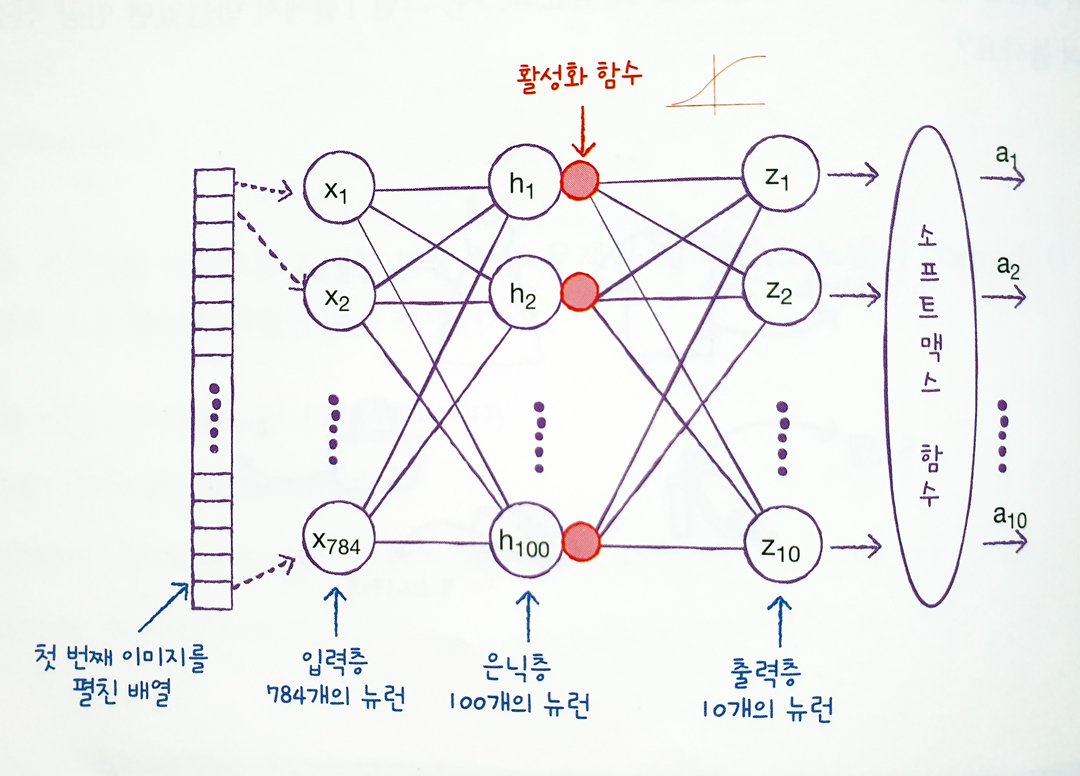

- 은닉층에는 주황색 원으로 활성화 함수가 표시되어 있음
- 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
- 출력층 활성화 함수는 이진 분류일 때는 시그모이드, 다중 분류일 때는 소프트맥스
- 은닉층 활성화 함수는 보다 자유로움


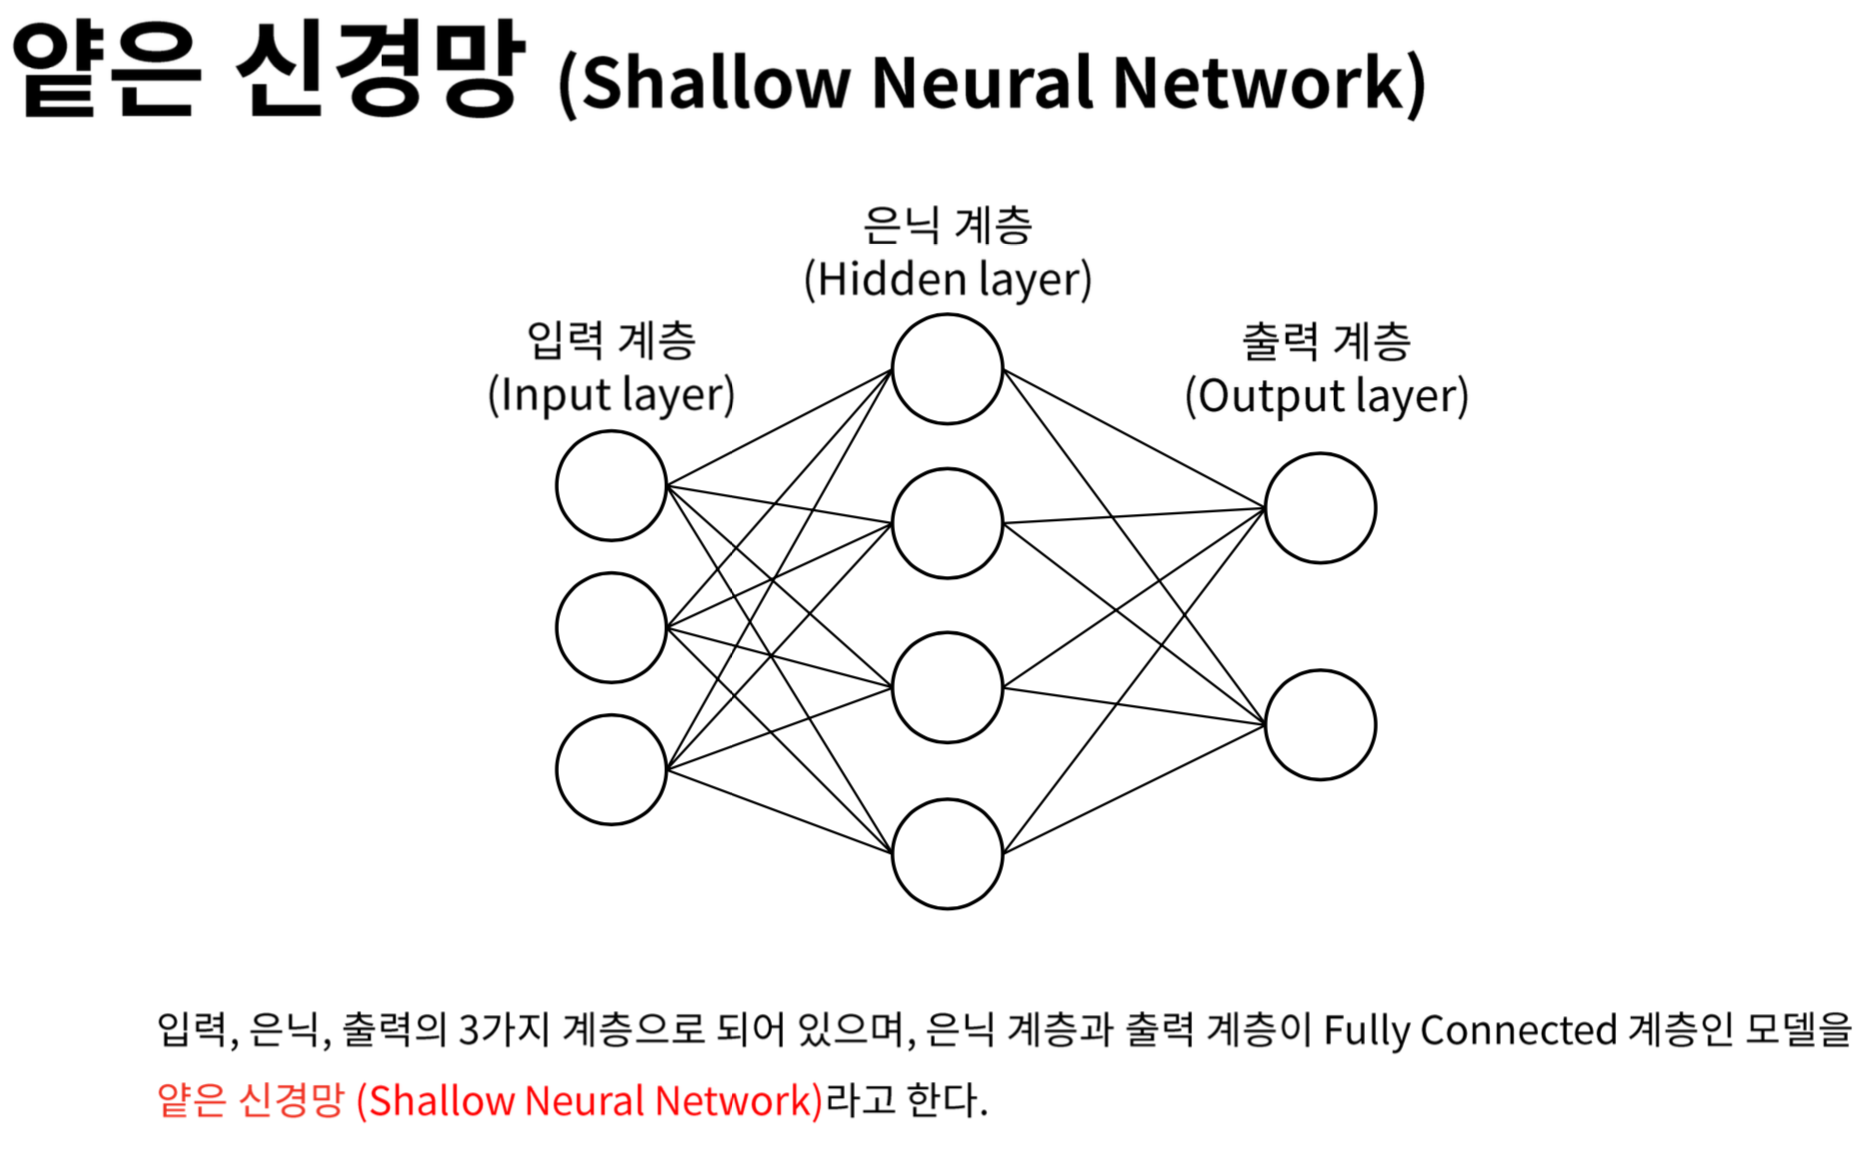

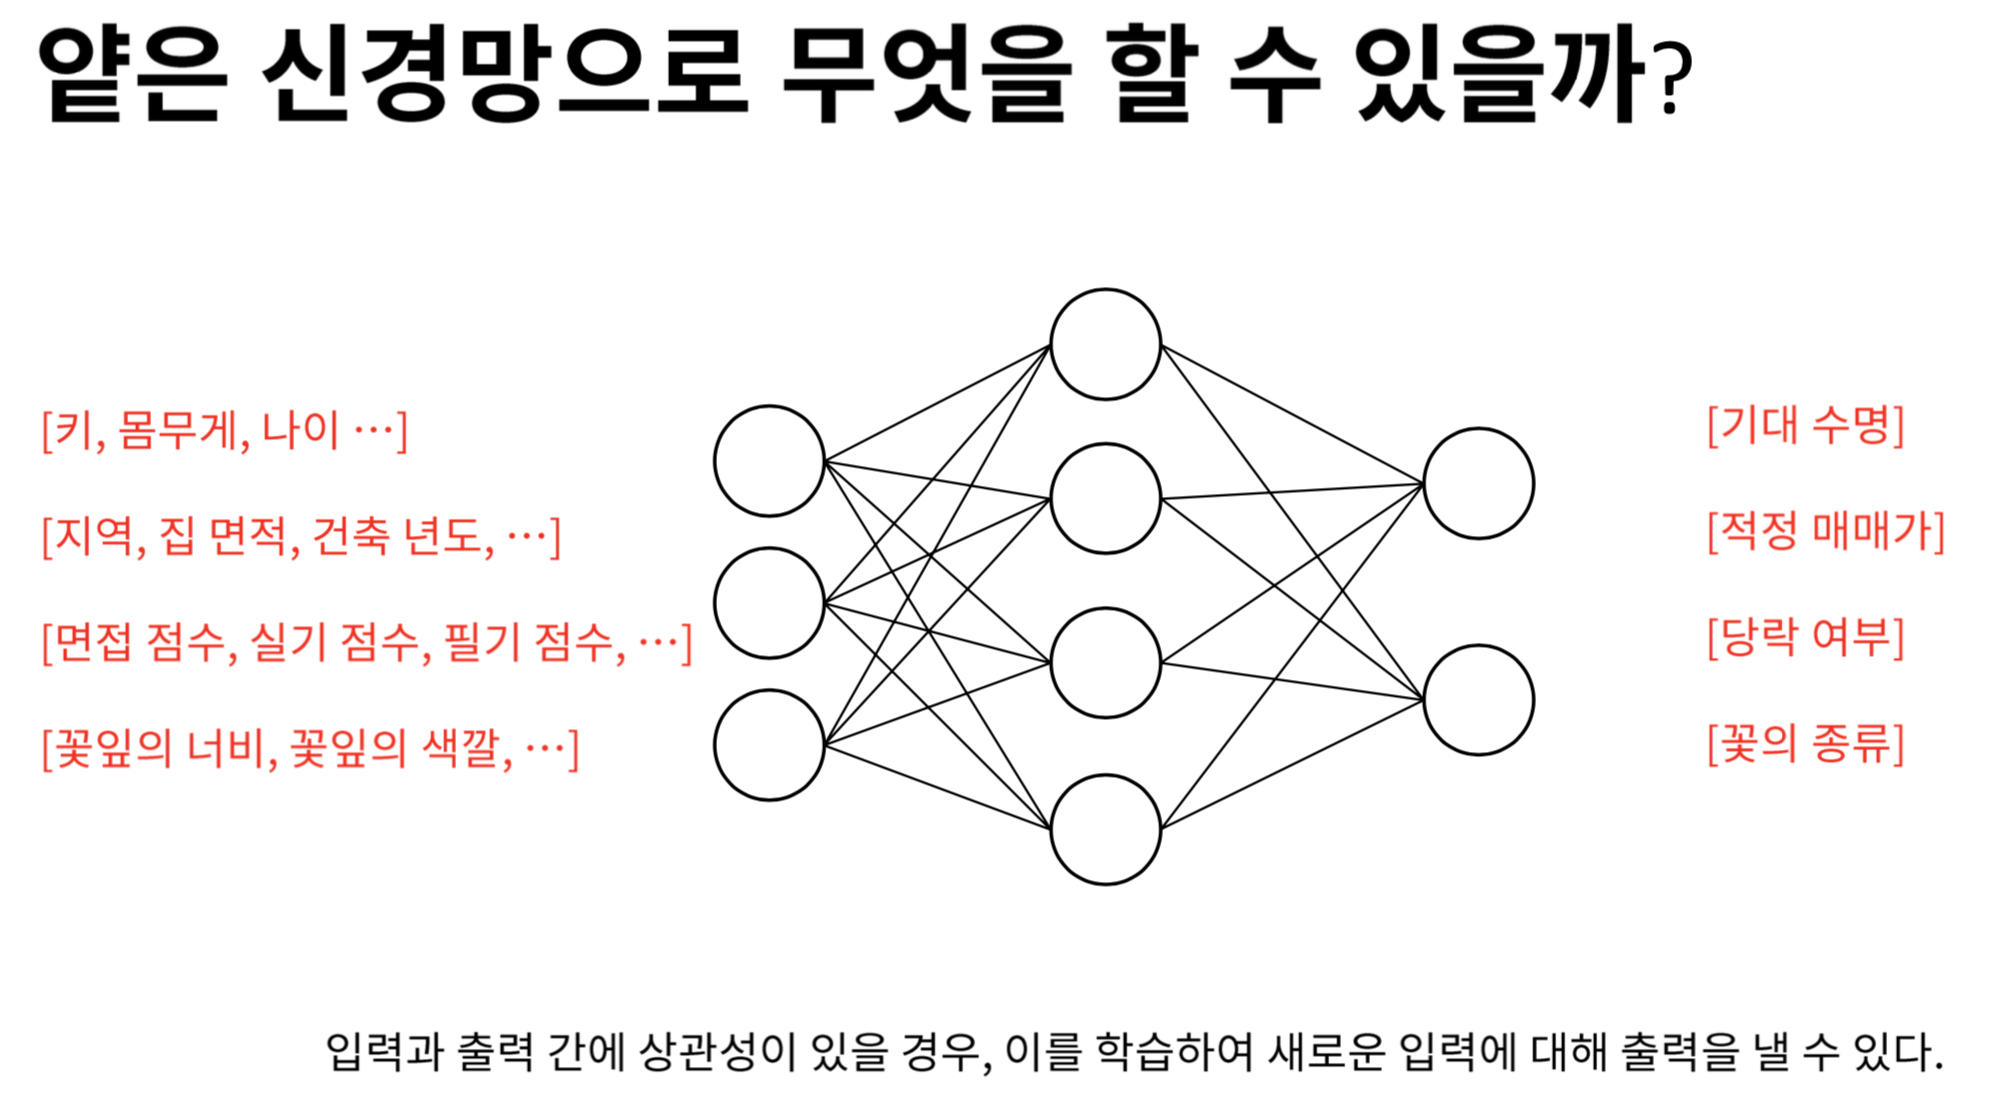

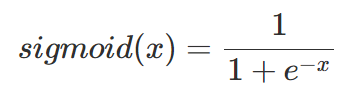

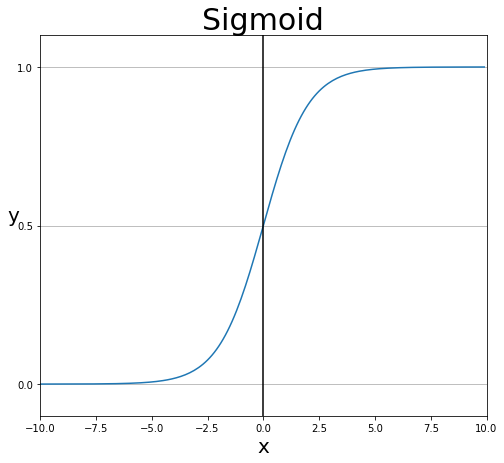

- 시그모이드 함수는 뉴런의 출력 z 값을 0~1 사이로 압축함

In [ ]:
# dense1 은닉층 한가지 제약 사항은 출력층의 뉴런 보다는 많게 만들어야 함. 활성화 함수는 시그모이드
# dense2 출력층 활성화 함수는 소프트맥스
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [ ]:
# dense1 dense2 리스트로 만들어 전달!
# 출력층을 마지막에 두어야하는 것을 주의
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


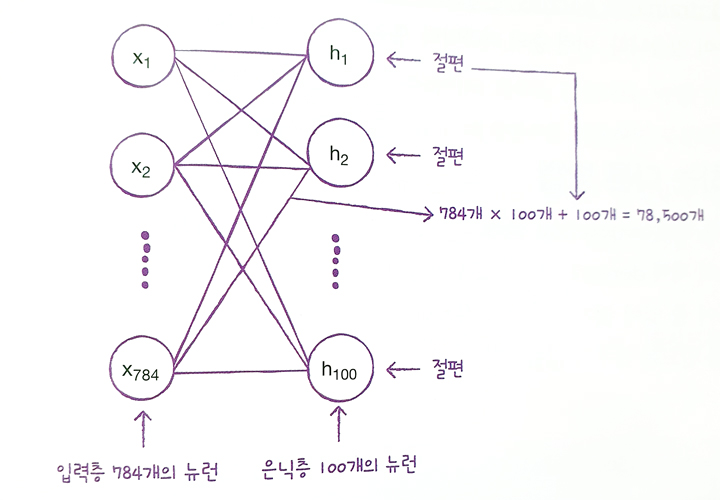

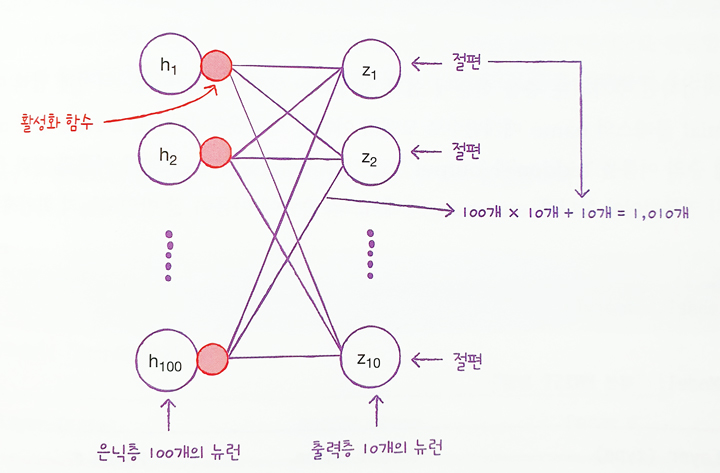

## 층을 추가하는 다른 방법

In [ ]:
# Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많음
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가함
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3344 - accuracy: 0.8782


## 렐루 활성화 함수

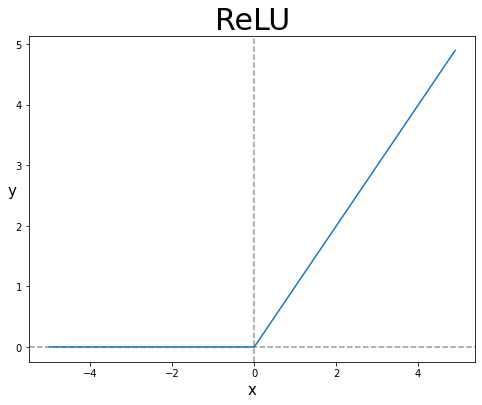

- 초창기 많이 쓰이던 활성화 함수는 시그모이드 함수
- 렐루함수는 입력이 양수일 때는 그대로 통과시키고
- 음수일 때는 0으로 만듦
- 이미지 처리에서 강점이 있음

In [ ]:
# Flatten 층 입력층과 은닉 사에 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5291 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8578
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3540 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8861


In [ ]:
# 시그모이드 함수를 사용했을 때와 비교하면, 성능이 조금 향상 됨
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3758 - accuracy: 0.8710


[0.3758259415626526, 0.8709999918937683]

## 옵티마이저

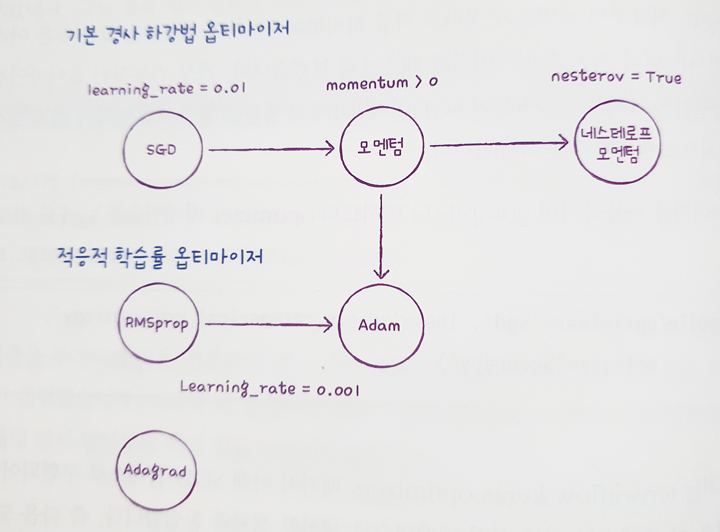

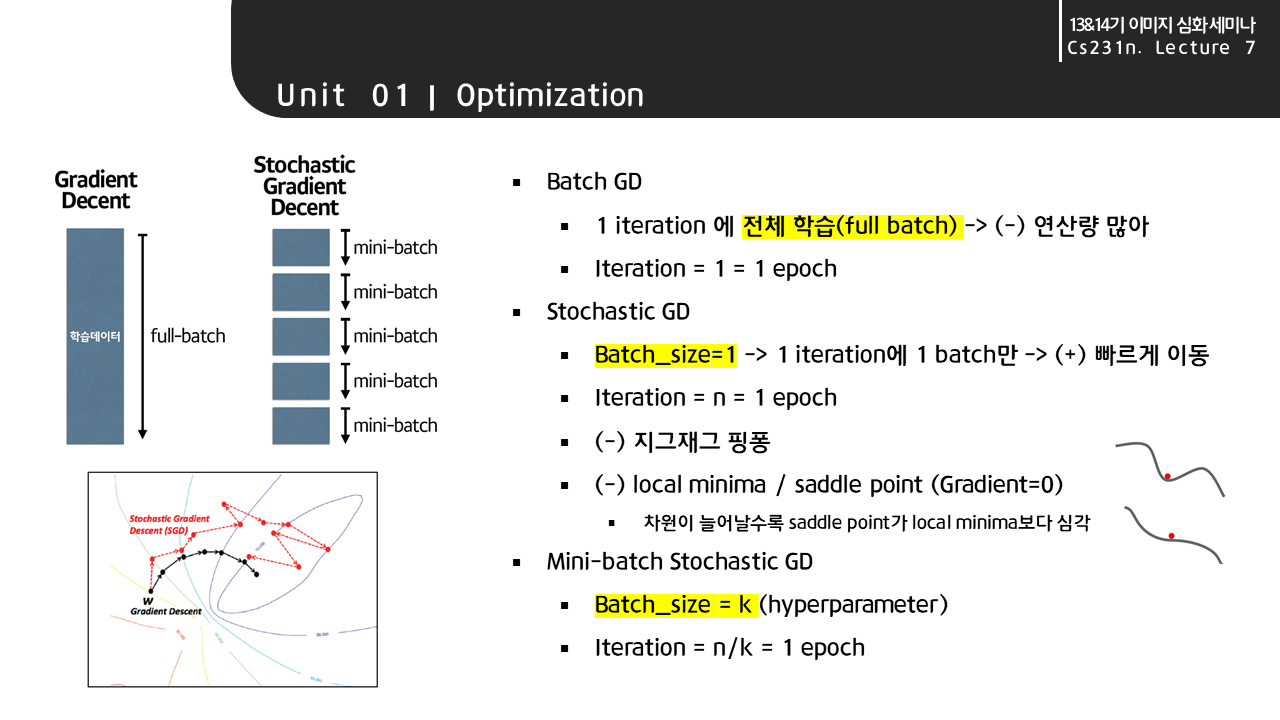

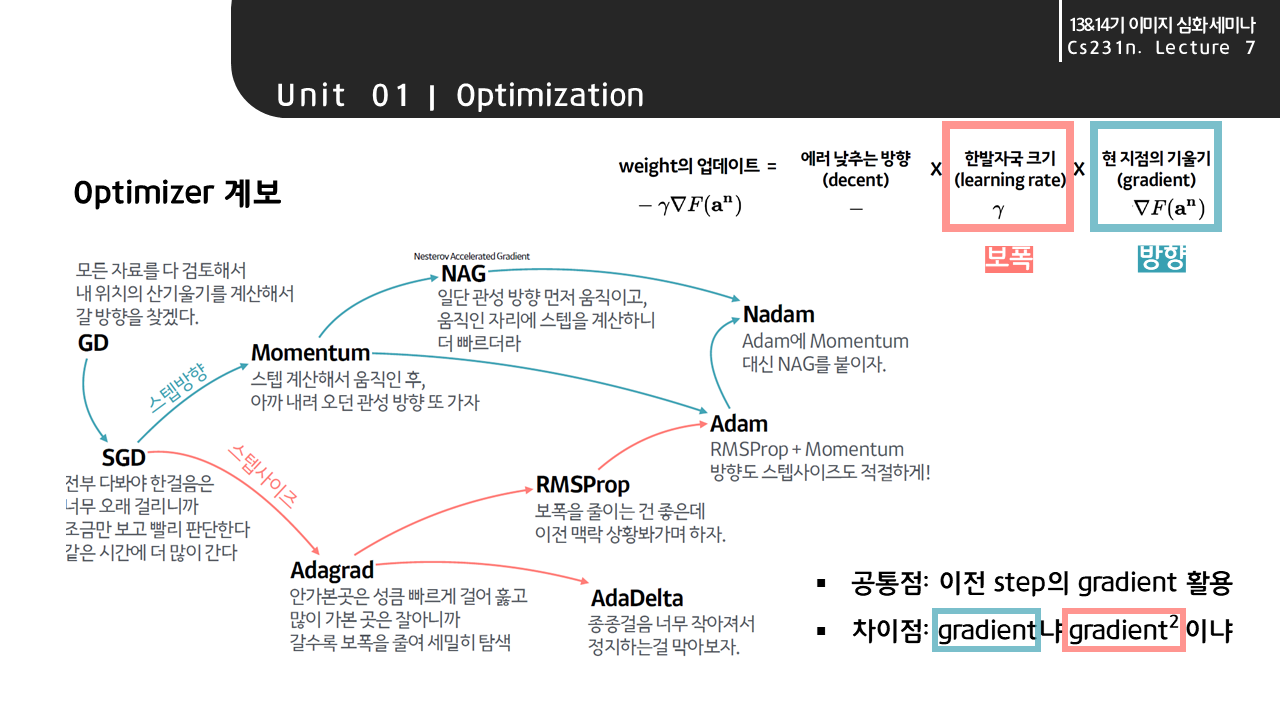

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3058 - accuracy: 0.8872


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508652448654175, 0.875083327293396]

# 신경망 모델 훈련

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [ ]:
# 이전 절에서 했던 것처럼 패션 MNIST 데이터 셋 적재, 훈련 세트 검증 세트 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 모델을 만드는 함수 만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


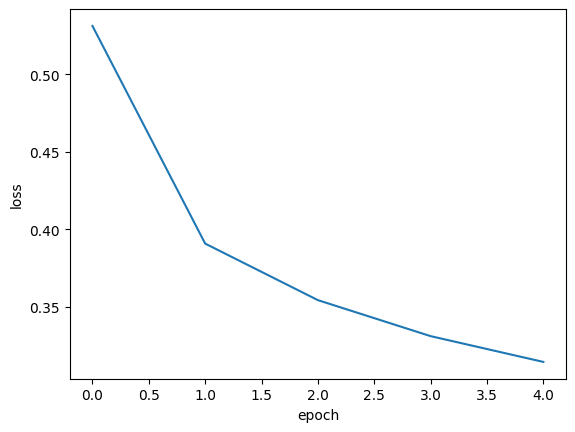

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

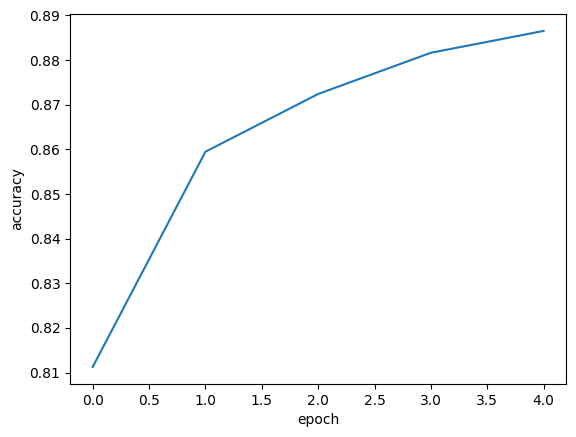

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

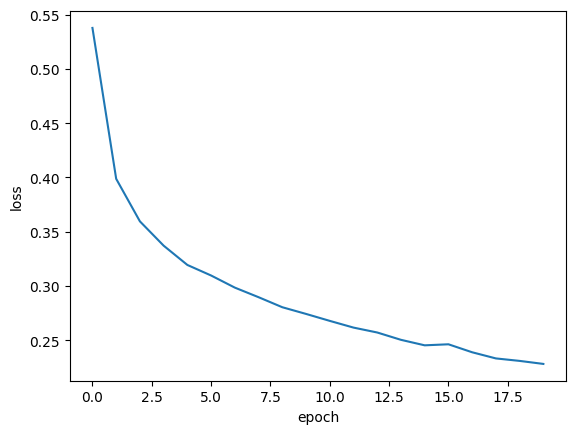

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

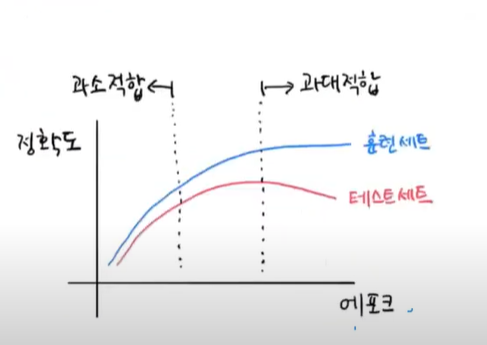

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


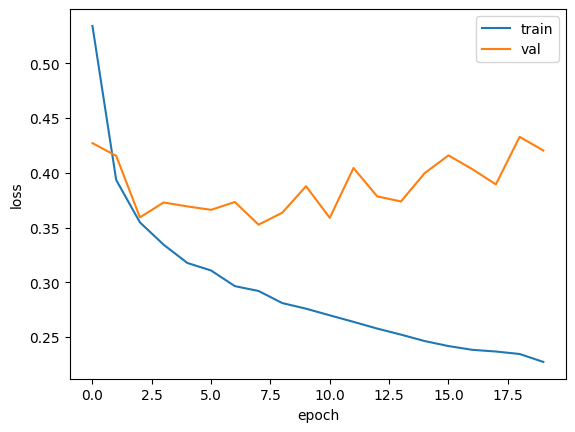

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

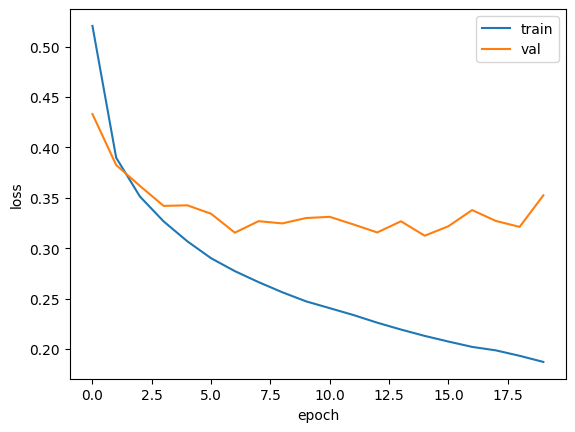

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

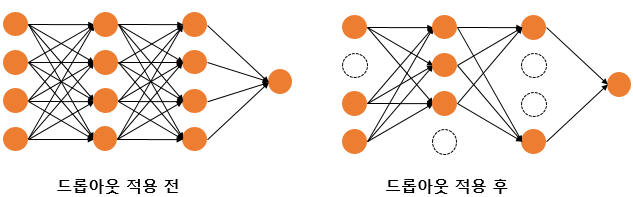

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

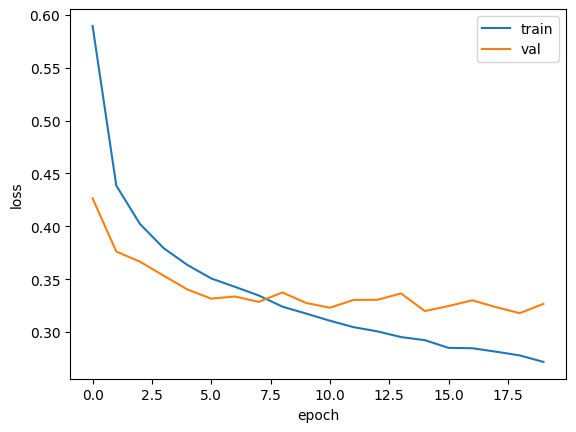

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

save, load_model은 모델 전체를 저장하기 때문에, load 이후에 별도로 처리할 필요가 없어 매우 간편합니다.

save_weights, load_weights는 가중치만 저장하기 때문에, 모델 architecture를 동일하게 만들어줘야 되죠. 이미 모델 architecture를 알고 있을때만 사용할 수 있습니다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 981176 Jul 13 16:54 best-model.h5
-rw-r--r-- 1 root root 333320 Jul 13 20:11 model-weights.h5
-rw-r--r-- 1 root root 981176 Jul 13 20:11 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8798333333333334


In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8798


[0.3358705937862396, 0.8798333406448364]

## 콜백

- 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- keras.callbacks 패키지 아래에 있는 클래스들
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8885


[0.3210257887840271, 0.8884999752044678]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

10


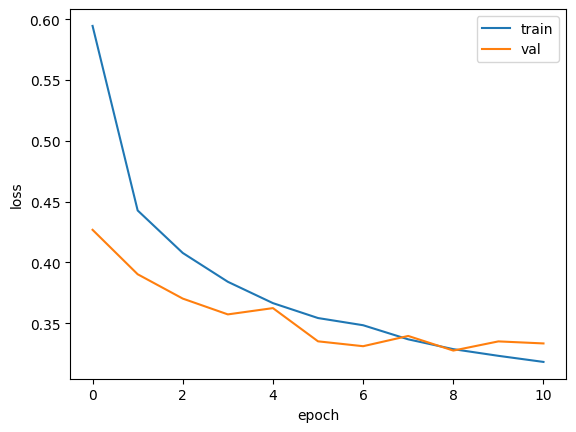

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8817


[0.3275802731513977, 0.8816666603088379]